## 작업형 1 예상문제

### T1-1 이상치를 찾아라
- **데이터에서 IQR을 활용해 Fare컬럼의 이상치를 찾고, 이상치 데이터의 여성 수를 구하시오**
- 강의 영상 : https://youtu.be/ipBW5D_UJEo
- 데이터셋 : titanic 
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 데이터 위치 "../input/titanic/train.csv" (copy&edit가 아닐 경우 별도로 데이터셋 불러와야 함)

In [ ]:
# 데이터 불러오기
import pandas as pd
import numpy as np
df = pd.read_csv("../input/titanic/train.csv")
df.head()

# Fare 의 이상치를 찾고 이상치 데이터의 여성 수 구하기
Q1 = df['Fare'].quantile(.25)
Q3 = df['Fare'].quantile(.75)
IQR = Q3 - Q1
Q1 - 1.5*IQR, Q3+1.5*IQR

outdata1 = df[df['Fare']<(Q1 - 1.5*IQR)]
outdata2 = df[df['Fare']>(Q3+1.5*IQR)]

len(outdata1), len(outdata2)

result = outdata2[outdata2['Sex']=='female']
len(result)

### T-2 이상치를 찾아라 - 소수점 나이
- **주어진 데이터에서 이상치(소수점 나이)를 찾고 올림, 내림, 버림(절사)했을때 3가지 모두 이상치 'age' 평균을 구한 다음 모두 더하여 출력하시오**

- 데이터셋 : basic1.csv
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 강의 영상 : https://youtu.be/c3Fr9G-ZYdw

In [ ]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
df = pd.read_csv("/kaggle/input/bigdatacertificationkr/basic1.csv")
df.head()

In [ ]:
df_out = df[(df['age']-np.floor(df['age'])) != 0 ]
len(df_out)

# 이상치를 포함한 데이터 올림, 내림, 버림의 평균값 

# 올림
m_ceil = np.ceil(df['age']).mean()

# 내림
m_floor = np.floor(df['age']).mean()

# 버림
m_trunc = np.trunc(df['age']).mean()

m_ceil, m_floor, m_trunc
print(m_ceil + m_floor + m_trunc)

### T1-3 결측치 처리(map 활용)
-  주어진 데이터에서 결측치가 80%이상 되는 컬럼은(변수는) 삭제하고, 80% 미만인 결측치가 있는 컬럼은 'city'별 중앙값으로 값을 대체하고 'f1'컬럼의 평균값을 출력하세요!
- 데이터셋 : basic1.csv 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 강의 영상 : https://youtu.be/WqlpqBRn7x4
- 코드 : https://www.kaggle.com/code/skymined/py-t1-3-map-expected-questions/edit


In [ ]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('../input/bigdatacertificationkr/basic1.csv')
df.head()

In [ ]:
# EDA - 결측비율 확인
df.isnull().sum()/df.shape[0]

In [ ]:
# f3 컬럼 삭제
print("삭제 전:", df.shape)
df = df.drop(['f3'], axis=1)
print("삭제 후:", df.shape)

# 결측치가 있는 컬럼을 제거하는 2가지 방법
# df.drop(['B', 'C'], axis=1)
# df.drop(columns=['B', 'C'])

In [ ]:
# 도시 확인
df['city'].unique()

# 도시별 중앙값 계산
s=df[df['city']=='서울']['f1'].median()
k=df[df['city']=='경기']['f1'].median()
b=df[df['city']=='부산']['f1'].median()
d=df[df['city']=='대구']['f1'].median()
s, k, b, d

#방법2
# k, d, b, s = df.groupby('city')['f1'].median()

# 대체 전 데이터 샘플 출력
df[18:21]

In [ ]:
# f1결측치 city별 중앙값으로 대체
df['f1'] = df['f1'].fillna(df['city'].map({'서울':s,'경기':k,'부산':b,'대구':d}))

# 만약 그냥 f1 중앙값으로 대체 한다면 
# df['f1'] = df['f1'].fillna(df['f1'].median())

# 대체 후 데이터 샘플 출력
df[18:21]

#결과 출력
print(df['f1'].mean())

### T1-4 왜도와 첨도 구하기(로그 스케일)

-  **주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오**
- 데이터셋 : House Prices - Advanced Regression Technique (https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 강의 영상 : https://youtu.be/_ft7ZlDlk7c
- 캐글  : https://www.kaggle.com/code/skymined/py-t1-4-expected-questions/edit

- 왜도 : 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표. 중앙값을 포함한 자료가 오른쪽에 더 많이 분포되어 있음
    - 왜도가 양수일 경우 오른쪽 부분에 긴 꼬리
    - 평균과 중앙값이 같으면 왜도는 0이 됨
- 첨도 : 극단적인 편차 또는 이상치가 많을 수록 큰 값을 나타냄
    - 3에 가까우면 산포도가 정규분포에 가까움
    - 3보다 큰 양수이면 정규분포보다 꼬리가 두꺼운 분포로 판단

In [ ]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df.head()

# 'SalePrice'컬럼 왜도와 첨도계산 
s1 = df['SalePrice'].skew()
k1 = df['SalePrice'].kurt()
s1, k1

# 'SalePrice'컬럼 로그변환
df['SalePrice'] = np.log1p(df['SalePrice'])

# 'SalePrice'컬럼 왜도와 첨도계산 
s2 = df['SalePrice'].skew()
k2 = df['SalePrice'].kurt()
s2, k2

# 모두 더한 다음 출력
print(round(s1+s2+k1+k2,2))

### T1-5 표준편차 구하기
- 주어진 데이터 중 basic1.csv에서 'f4'컬럼 값이 'ENFJ'와 'INFP'인 'f1'의 표준편차 차이를 절대값으로 구하시오
- 데이터셋 : basic1.csv
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작

In [ ]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('../input/bigdatacertificationkr/basic1.csv')
df.head()

# 조건에 맞는 데이터 (ENFJ, INFP)
data1 = df[df['f4']=='ENFJ']
data2 = df[df['f4']=='INFP']


# 조건에 맞는 f1의 표준편차 (ENFJ, INFP)
std1 = data1['f1'].std()
std2 = data2['f1'].std()
std1, std2

# 두 표준편차 차이 절대값 출력
print(np.abs(std1-std2))

### T1-6 결측치 제거 및 그룹 합계
- 주어진 데이터 중 basic1.csv에서 'f1'컬럼 결측 데이터를 제거하고, 'city'와 'f2'을 기준으로 묶어 합계를 구하고, 'city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오
- 데이터셋 : basic1.csv
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 캐글 : https://www.kaggle.com/code/skymined/py-t1-6-expected-questions/edit

In [ ]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('../input/bigdatacertificationkr/basic1.csv')
df.head()

# f1컬럼 결측치 제거
df = df.dropna(subset=['f1'])

# 그룹 합계 계산
df2 = df.groupby(['city','f2']).sum()
df2

# 조건에 맞는 값 출력
print(df2.iloc[0]['f1'])

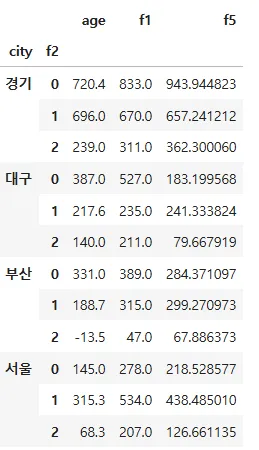

### T1-7 값 변경 및 2개 이상의 조건
**'f4'컬럼의 값이 'ESFJ'인 데이터를 'ISFJ'로 대체하고, 'city'가 '경기'이면서 'f4'가 'ISFJ'인 데이터 중 'age'컬럼의 최대값을 출력하시오!**
- 데이터셋 : basic1.csv
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 캐글 : https://www.kaggle.com/code/skymined/py-t1-7-2-expected-questions/edit

In [ ]:
# 라이브러리 및 데이터 불러오기
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('../input/bigdatacertificationkr/basic1.csv')
df.head()

# ESFJ 값을 가진 데이터 확인
df[df['f4']=='ESFJ']

In [ ]:
# 값 변경하기
df['f4'] = df['f4'].replace('ESFJ', 'ISFJ')
df[df['f4']=='ESFJ']

In [ ]:
# 2개의 조건에 맞는 값중 age컬럼의 최대값
# 'city'가 '경기'이면서 'f4'가 'ISFJ'인 데이터 중 'age'컬럼의 최대값을 출력
data = df[(df['city']=='경기')&(df['f4']=='ISFJ')]
data['age'].max()

### T1-8 누적합 그리고 보간(결측치 처리)
**주어진 데이터 셋에서 'f2' 컬럼이 1인 조건에 해당하는 데이터의 'f1'컬럼 누적합을 계산한다. 이때 발생하는 누적합 결측치는 바로 뒤의 값을 채우고, 누적합의 평균값을 출력한다. (단, 결측치 바로 뒤의 값이 없으면 다음에 나오는 값을 채워넣는다)**

- 데이터셋 : basic1.csv
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작

In [ ]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('../input/bigdatacertificationkr/basic1.csv')
df.head(2)

In [ ]:
# 조건에 따른 누적합
df2 = df[df['f2']==1]['f1'].cumsum()
df2

In [ ]:
# 결측치 처리 (뒤에 나오는 값으로 채움)
df2 = df2.fillna(method = 'bfill')

# 평균 출력
print(df2.mean())

### T1-9 수치형 변수 표준화
**주어진 데이터에서 'f5'컬럼을 표준화(Standardization (Z-score Normalization))하고 그 중앙값을 구하시오**
- 데이터셋 : basic1.csv
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작

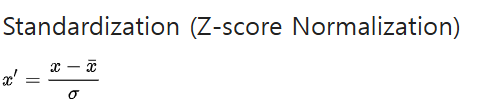

In [ ]:
# hint

from sklearn.preprocessing import StandardScaler
data = [[0, 2], [0.4, 0.2], [1.1, 10], [11, 19], [34, 21], [6, 40]]
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.transform(data))

In [ ]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('../input/bigdatacertificationkr/basic1.csv')
df.head(2)

# 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['f5']=scaler.fit_transform(df[['f5']])
df.head()

# 중앙값 출력
print(df['f5'].median())

###  T1-10 여-존슨과 박스-칸스 변환
**주어진 데이터에서 20세 이상인 데이터를 추출하고 'f1'컬럼을 결측치를 최빈값으로 채운 후, f1 컬럼의 여-존슨과 박스콕스 변환 값을 구하고, 두 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)하시오**
- 데이터셋 : basic1.csv
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작

In [ ]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import power_transform

df = pd.read_csv('../input/bigdatacertificationkr/basic1.csv')
df.head(5)

# 조건에 맞는 데이터 : 20세 이상인 데이터를 추출하고
df = df[df['age']>=20]
df['age'].unique()

# 최빈값으로 'f1' 컬럼 결측치 대체
mod = df['f1'].mode()
mod[0]

df['f1'] = df['f1'].fillna(mod[0])

# 'f1'데이터 여-존슨 yeo-johnson 값 구하기
df['y1'] = power_transform(df[['f1']])
df['y1']

# 'f1'데이터 박스-콕스 box-cox 값 구하기
df['y2'] = power_transform(df[['f1']], method='box-cox')
df['y2']

# 두 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)
df['abs'] = np.abs(df['y1']-df['y2'])
df['abs']

print(round(df['abs'].sum(),2))

### T1-11 min-max 기준 상하위 값
**min-max스케일링 기준 상하위 5% 구하기**
- **주어진 데이터에서 'f5'컬럼을 min-max 스케일 변환한 후, 상위 5%와 하위 5% 값의 합을 구하시오**

- 데이터셋 : basic1.csv
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- File -> Editor Type -> Script

In [7]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('../basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['f5_2'] = scaler.fit_transform(df[['f5']])

In [9]:
df.head()

,id,age,city,f1,f2,f3,f4,f5,f5_2
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791,0.919533
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826,0.570252
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986,0.084129
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078,0.483685
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869,0.219708


In [10]:
lower = df['f5_2'].quantile(0.05)
upper = df['f5_2'].quantile(0.95)
print(lower+upper)

1.0248740983597389


### T1-12 상위 10개, 하위 10개 차이
**주어진 데이터에서 상위 10개 국가의 접종률 평균과 하위 10개 국가의 접종률 평균을 구하고, 그 차이를 구해보세요**
- (단, 100%가 넘는 접종률 제거, 소수 첫째자리까지 출력)
- 데이터셋 : ../input/covid-vaccination-vs-death/covid-vaccination-vs-death_ratio.csv

In [11]:
import pandas as pd
df = pd.read_csv("../covid-vaccination-vs-death_ratio.csv")
df.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809


In [17]:
df2 = df.groupby('country').max()
df2.head(), df2.shape

(             Unnamed: 0 iso_code        date  total_vaccinations  \
 country                                                            
 Afghanistan          35      AFG  2022-03-22           5751015.0   
 Albania             219      ALB  2022-03-24           2754244.0   
 Algeria             239      DZA  2022-03-09          13704895.0   
 Andorra             270      AND  2022-03-13            151997.0   
 Angola              323      AGO  2022-03-25          17535411.0   
 
              people_vaccinated  people_fully_vaccinated  New_deaths  \
 country                                                               
 Afghanistan          5082824.0                4420127.0          86   
 Albania              1278902.0                1215199.0          18   
 Algeria              7461932.0                6110712.0          34   
 Andorra                57817.0                  53367.0           2   
 Angola              11235059.0                5993792.0          18   
 
         

In [19]:
df2 = df2[df2['ratio']<=100]
df2.shape

(194, 9)

In [30]:
df2 = df2.sort_values(by='ratio', ascending=False)

In [ ]:
upper = df2.iloc[:10]['ratio'].mean()
lower = df2.iloc[-10:]['ratio'].mean()
upper, lower

# top = df2['ratio'].head(10).mean()
# bottom = df2['ratio'].tail(10).mean()

(91.81697544672711, 3.4504083912453525)

In [38]:
print(round(upper-lower,1))

88.4


### T1-13 상관관계 구하기
**주어진 데이터에서 상관관계를 구하고, quality와의 상관관계가 가장 큰 값과, 가장 작은 값을 구한 다음 더하시오!**
- 단, quality와 quality 상관관계 제외, 소수점 둘째 자리까지 반올림하여 계산
 - 데이터셋 : ../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv

In [39]:
import pandas as pd
df = pd.read_csv("../data/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
df_corr = df.corr()
df_corr = df_corr[:-1]
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
max = df_corr['quality'].max() # 부호 포함
min = df_corr['quality'].iloc[(df_corr['quality'].abs()).argmin()] # argmin은 최솟값의 index를 반환함
max, min

(0.47616632400113656, 0.013731637340065779)

In [48]:
print(max+min)

0.48989796134120234


### T1-14 2개의 조건에 따른 상위 값 찾기
**city와 f4를 기준으로 f5의 평균값을 구한 다음, f5를 기준으로 상위 7개 값을 모두 더해 출력하시오 (소수점 둘째자리까지 출력)**
- 데이터셋 : basic1.csv 

In [49]:
import pandas as pd
df = pd.read_csv("../data/bigdatacertificationkr/basic1.csv")
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [51]:
df2 = df.groupby(['city', 'f4'])
df2

In [52]:
f5mean = df2['f5'].mean()
f5mean

city  f4  
경기    ENTJ    51.693799
      ENTP    54.704075
      ESFJ    97.381034
      ESFP    53.187491
      ESTJ    79.487043
      ESTP    34.022130
      INFJ    80.138280
      INFP    90.531801
      INTJ    80.388795
      INTP    55.887974
      ISFJ    64.468233
      ISFP    69.108148
      ISTP    48.431184
대구    ENFJ    39.964658
      ENFP    32.574085
      ENTP    13.049921
      ESFJ    20.129444
      ESTJ    77.323257
      ESTP    28.915814
      INTP    26.698797
      ISFJ    59.883434
      ISTJ    83.685380
      ISTP    29.269869
부산    ENFJ    17.252986
      ENFP    68.176229
      ENTP    74.012327
      ESFJ    73.586397
      ESTJ    25.280992
      ESTP    62.730150
      INFJ    53.447698
      INFP    48.431184
      INTP    13.049921
      ISFJ    13.049921
      ISFP    29.269869
      ISTP    69.730313
서울    ENFJ    75.818808
      ENFP    98.429899
      ENTJ    67.886373
      ENTP     9.796378
      ESFJ    50.469183
      ESFP    16.283854
     

In [57]:
f5mean = f5mean.sort_values(ascending = False)

In [58]:
print(f5mean[:7].sum())

643.6813362975


### T1-15 슬라이싱&조건
**주어진 데이터 셋에서 age컬럼 상위 20개의 데이터를 구한 다음**
- f1의 결측치를 중앙값으로 채운다.
- 그리고 f4가 ISFJ와 f5가 20 이상인 f1의 평균값을 출력하시오!
- 데이터셋 : basic1.csv 

In [67]:
import pandas as pd
df = pd.read_csv("../data/bigdatacertificationkr/basic1.csv")
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [68]:
df = df.sort_values('age', ascending=False).head(20)
df.head()

,id,age,city,f1,f2,f3,f4,f5
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
36,id37,100.0,부산,NaN,0,NaN,ESTP,33.308999
44,id45,97.0,대구,88.0,0,NaN,ENFJ,13.049921
51,id52,97.0,대구,82.0,1,NaN,ISFJ,90.496999
91,id92,97.0,경기,78.0,1,NaN,INFP,97.381034


In [69]:
df['f1'] = df['f1'].fillna(df['f1'].median())
df.head()

,id,age,city,f1,f2,f3,f4,f5
96,id97,100.0,경기,77.5,0,NaN,INFP,67.886373
36,id37,100.0,부산,77.5,0,NaN,ESTP,33.308999
44,id45,97.0,대구,88.0,0,NaN,ENFJ,13.049921
51,id52,97.0,대구,82.0,1,NaN,ISFJ,90.496999
91,id92,97.0,경기,78.0,1,NaN,INFP,97.381034


In [70]:
# f4가 ISFJ와 f5가 20 이상인 f1의 평균값을 출력
print(df[(df['f4']=='ISFJ') & (df['f5'] >=20)]['f1'].mean())

73.875


### T1-16 분산
**주어진 데이터 셋에서 f2가 0값인 데이터를 age를 기준으로 오름차순 정렬하고 앞에서 부터 20개의 데이터를 추출한 후 f1 결측치(최소값)를 채우기 전과 후의 분산 차이를 계산하시오 (소수점 둘째 자리까지)**

- 데이터셋 : basic1.csv 

In [71]:
import pandas as pd
df = pd.read_csv("../data/bigdatacertificationkr/basic1.csv")
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [72]:
df2 = df[df['f2']==0].sort_values('age', ascending=True).head(20)
df2.head()

,id,age,city,f1,f2,f3,f4,f5
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
85,id86,2.0,경기,NaN,0,NaN,ESTP,29.269869
56,id57,3.0,대구,111.0,0,NaN,ISFJ,29.269869
90,id91,6.0,경기,72.0,0,NaN,INTP,9.796378


In [73]:
# f1 결측치(최소값)를 채우기 전과 후의 분산 차이를 계산

df3 = df2.copy()
df3['f1'] = df3['f1'].fillna(df3['f1'].min())

In [74]:
var2 = df2['f1'].var()
var3 = df3['f1'].var()

In [76]:
print(round(abs(var2-var3),2))

38.44


### T1-17 시계열 데이터
**2022년 5월 sales의 중앙값을 구하시오**
- 데이터셋 : basic2.csv